In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import sparse_categorical_crossentropy
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Cargar el dataset
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

#normalizamos
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]

print('Train: X=%s, y=%s' % (train_x.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape))




Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


In [ ]:
#LeNet-5 
model = Sequential()
model.add(Conv2D(6, 5, activation='tanh',padding='same', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(2, 2))

model.add(Conv2D(16, 5, activation='sigmoid', padding='valid'))
model.add(AveragePooling2D(2, 2))

model.add(Conv2D(120, 5, activation='sigmoid', padding='valid'))

model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               1

In [ ]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model_history = model.fit(train_x, train_y, epochs=3,batch_size= 64,
                    validation_data=(val_x, val_y))

Epoch 1/3
938/938 [==============================] - 33s 34ms/step - loss: 0.5259 - acc: 0.8259 - val_loss: 0.1443 - val_acc: 0.9584
Epoch 2/3
938/938 [==============================] - 31s 33ms/step - loss: 0.1237 - acc: 0.9615 - val_loss: 0.1010 - val_acc: 0.9718
Epoch 3/3
938/938 [==============================] - 31s 33ms/step - loss: 0.0872 - acc: 0.9732 - val_loss: 0.0644 - val_acc: 0.9828


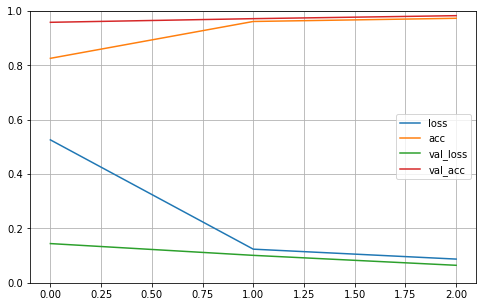

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()